In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import numpy as np
from PIL import Image

# DataGenerator

In [3]:
data_path = '/content/drive/MyDrive/DATASET/image data'
fruit = 'grape'

In [4]:
# Creating Train Data Path for a single Fruit
train_data_path = os.path.join(data_path,"train",fruit)

In [5]:
test_data_path = os.path.join(data_path,"test",fruit)

In [6]:
def load_image_dataset(dataset_directory:str,img_height:int = 224,img_width:int = 224,flatten_image:bool = False):
    """
        Params:
        dataset_directory: path to your dataset directory,
        img_height = standard height of image
        img_width = standard width of image
        flatten_image = False: Image will be returned with actual size
                        True : Image will be flattened

    """

    # Create empty lists to store the images and their corresponding labels
    images = []
    labels = []

    # Iterate through the subdirectories (each subdirectory represents a class)
    for class_name in os.listdir(dataset_directory):
        class_dir = os.path.join(dataset_directory, class_name)
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            image = Image.open(image_path)  # Open the image using PIL
            image = image.resize((img_width, img_height))  # Resize the image to a desired size
            image = np.array(image)  # Convert the image to a numpy array
            images.append(image)
            labels.append(class_name)

    # Convert the lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)


    if flatten_image: # flattening image i.e converting image into vector
        images = images.reshape(images.shape[0],-1)

    return images,labels


In [7]:
X_train,y_train = load_image_dataset(dataset_directory=train_data_path,flatten_image=True)

In [8]:
X_test,y_test =  load_image_dataset(dataset_directory=test_data_path,flatten_image=True)

In [9]:
X_train.shape

(2927, 150528)

In [10]:
y_train.shape

(2927,)

In [11]:
import joblib

def save_model(model,fruit:str,filename:str,location:str):

    location = os.path.join(location,fruit)
    if not os.path.isdir(location):
        os.mkdir(location)

    filename = os.path.join(location,filename+".jblib")

    joblib.dump(model,filename=filename)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
from sklearn.metrics import accuracy_score

# Model - 1 Support vector Machine

In [14]:
from sklearn.svm import SVC

model1 = SVC()
model1.fit(X_train, y_train)

SVC()

In [15]:
train_pred1 = model1.predict(X_train)
train_pred1

array(['leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', ..., 'black rot',
       'black rot', 'black rot'], dtype='<U34')

In [16]:
train_score1=accuracy_score(y_train,train_pred1)
A= round(train_score1, 4)
train_score1

0.953877690468056

In [17]:
pred1 = model1.predict(X_test)
pred1

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'black rot',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf 

In [18]:
score1=accuracy_score(y_test,pred1)
a= round(score1, 4)
score1

0.9506172839506173

In [19]:
print("Support vector Machine Confusion matrix: \n\n", confusion_matrix(y_test, pred1))

Support vector Machine Confusion matrix: 

 [[109   7   1   1]
 [  7 131   0   0]
 [  1   0  41   0]
 [  3   0   0 104]]


In [20]:
print("Support vector Machine Classification report: \n\n", classification_report(y_test, pred1))
print("Test Accuracy: {}%".format(round(model1.score(X_test, y_test)*100, 2)))

Support vector Machine Classification report: 

                                     precision    recall  f1-score   support

                         black rot       0.91      0.92      0.92       118
              esca (black measles)       0.95      0.95      0.95       138
                           healthy       0.98      0.98      0.98        42
leaf blight (isariopsis leaf spot)       0.99      0.97      0.98       107

                          accuracy                           0.95       405
                         macro avg       0.96      0.96      0.96       405
                      weighted avg       0.95      0.95      0.95       405

Test Accuracy: 95.06%


In [21]:
save_model(model1,fruit=fruit,location="/content/drive/MyDrive/Colab Notebooks/ml/saved",filename="SVM")

# Model -2  Multi-layer Perceptron

In [22]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier()
model2.fit(X_train, y_train)

MLPClassifier()

In [23]:
train_pred2 = model2.predict(X_train)
train_pred2

array(['leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', ..., 'black rot',
       'black rot', 'black rot'], dtype='<U34')

In [24]:
train_score2=accuracy_score(y_train,train_pred2)
B= round(train_score2, 4)
train_score2

0.822685343354971

In [25]:
pred2 = model2.predict(X_test)
pred2

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'black rot',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'leaf blight (isariopsis leaf spot)', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'black rot', 'healthy', 'healthy', 'healthy',
       'leaf blight (isariopsis leaf spot)', 'healthy', 'black rot',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'black rot',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       '

In [26]:
score2=accuracy_score(y_test,pred2)
b= round(score2, 4)
score2

0.8246913580246914

In [27]:
print(" Multi-layer Perceptron Confusion matrix: \n\n", confusion_matrix(y_test, pred2))

 Multi-layer Perceptron Confusion matrix: 

 [[111   0   0   7]
 [ 58  80   0   0]
 [  4   0  36   2]
 [  0   0   0 107]]


In [28]:
print(" Multi-layer Perceptron report: \n\n", classification_report(y_test, pred2))
print("Test Accuracy: {}%".format(round(model2.score(X_test, y_test)*100, 2)))

 Multi-layer Perceptron report: 

                                     precision    recall  f1-score   support

                         black rot       0.64      0.94      0.76       118
              esca (black measles)       1.00      0.58      0.73       138
                           healthy       1.00      0.86      0.92        42
leaf blight (isariopsis leaf spot)       0.92      1.00      0.96       107

                          accuracy                           0.82       405
                         macro avg       0.89      0.84      0.84       405
                      weighted avg       0.88      0.82      0.82       405

Test Accuracy: 82.47%


In [29]:
save_model(model2,fruit=fruit,location="/content/drive/MyDrive/Colab Notebooks/ml/saved",filename="MLP")

# Model -3  AdaBoost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

model3 = AdaBoostClassifier()
model3.fit(X_train, y_train)

AdaBoostClassifier()

In [31]:
train_pred3 = model3.predict(X_train)
train_pred3

array(['leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', ..., 'black rot',
       'esca (black measles)', 'esca (black measles)'], dtype='<U34')

In [32]:
train_score3=accuracy_score(y_train,train_pred3)
C= round(train_score3, 4)
train_score3

0.7386402459856508

In [33]:
pred3 = model3.predict(X_test)
pred3

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'black rot', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'black rot', 'leaf blight (isariopsis leaf spot)', 'healthy',
       'healthy', 'healthy', 'healthy',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', 'black rot',
       'leaf blight (isariopsis l

In [34]:
score3=accuracy_score(y_test,pred3)
c= round(score3, 4)
score3

0.7407407407407407

In [35]:
print(" AdaBoost Confusion matrix: \n\n", confusion_matrix(y_test, pred3))

 AdaBoost Confusion matrix: 

 [[ 61  44   2  11]
 [ 24 113   0   1]
 [  2   0  39   1]
 [ 18   2   0  87]]


In [36]:
print(" AdaBoost Classification report: \n\n", classification_report(y_test, pred3))
print("Test Accuracy: {}%".format(round(model3.score(X_test, y_test)*100, 2)))

 AdaBoost Classification report: 

                                     precision    recall  f1-score   support

                         black rot       0.58      0.52      0.55       118
              esca (black measles)       0.71      0.82      0.76       138
                           healthy       0.95      0.93      0.94        42
leaf blight (isariopsis leaf spot)       0.87      0.81      0.84       107

                          accuracy                           0.74       405
                         macro avg       0.78      0.77      0.77       405
                      weighted avg       0.74      0.74      0.74       405

Test Accuracy: 74.07%


In [37]:
save_model(model3,fruit=fruit,location="/content/drive/MyDrive/Colab Notebooks/ml/saved",filename="Ada")

# Model -4 K-nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier


model4= KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)
model4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [39]:
train_pred4 = model4.predict(X_train)
train_pred4

array(['leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', ..., 'black rot',
       'black rot', 'black rot'], dtype='<U34')

In [40]:
train_score4=accuracy_score(y_train,train_pred4)
D= round(train_score4, 3)
train_score4

0.7587974034847967

In [41]:
pred4= model4.predict(X_test)
pred4

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'esca (black measles)', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isari

In [42]:
score4=accuracy_score(y_test,pred4)
d= round(score4, 4)
score4

0.7506172839506173

In [43]:
print("K-nearest Neighbors Confusion matrix: \n\n", confusion_matrix(y_test, pred4))

K-nearest Neighbors Confusion matrix: 

 [[109   2   6   1]
 [ 70  55  12   1]
 [  0   1  41   0]
 [  5   0   3  99]]


In [44]:
print("K-nearest Neighbors Classification report: \n\n", classification_report(y_test, pred4))
print("Test Accuracy: {}%".format(round(model4.score(X_test, y_test)*100, 2)))

K-nearest Neighbors Classification report: 

                                     precision    recall  f1-score   support

                         black rot       0.59      0.92      0.72       118
              esca (black measles)       0.95      0.40      0.56       138
                           healthy       0.66      0.98      0.79        42
leaf blight (isariopsis leaf spot)       0.98      0.93      0.95       107

                          accuracy                           0.75       405
                         macro avg       0.80      0.81      0.76       405
                      weighted avg       0.82      0.75      0.73       405

Test Accuracy: 75.06%


In [45]:
save_model(model4,fruit=fruit,location="/content/drive/MyDrive/Colab Notebooks/ml/saved",filename="KNN")

# Model -5 Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

model5= RandomForestClassifier(n_estimators= 150, criterion="gini",verbose=1, random_state=0)
model5.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   45.4s


RandomForestClassifier(n_estimators=150, random_state=0, verbose=1)

In [47]:
train_pred5 = model5.predict(X_train)
train_pred5

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


array(['leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', ..., 'black rot',
       'black rot', 'black rot'], dtype='<U34')

In [48]:
train_score5=accuracy_score(y_train,train_pred5)
E= round(train_score5, 4)
train_score5

1.0

In [49]:
pred5= model5.predict(X_test)
pred5

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf sp

In [50]:
score5=accuracy_score(y_test,pred5)
e= round(score5, 4)
score5

1.0

In [51]:
print("Random Forest Confusion matrix: \n\n", confusion_matrix(y_test, pred5))

Random Forest Confusion matrix: 

 [[118   0   0   0]
 [  0 138   0   0]
 [  0   0  42   0]
 [  0   0   0 107]]


In [52]:
print(" Random Forest  Classification report: \n\n", classification_report(y_test, pred5))
print("Test Accuracy: {}%".format(round(model5.score(X_test, y_test)*100, 2)))

 Random Forest  Classification report: 

                                     precision    recall  f1-score   support

                         black rot       1.00      1.00      1.00       118
              esca (black measles)       1.00      1.00      1.00       138
                           healthy       1.00      1.00      1.00        42
leaf blight (isariopsis leaf spot)       1.00      1.00      1.00       107

                          accuracy                           1.00       405
                         macro avg       1.00      1.00      1.00       405
                      weighted avg       1.00      1.00      1.00       405

Test Accuracy: 100.0%


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [53]:
save_model(model5,fruit=fruit,location="/content/drive/MyDrive/Colab Notebooks/ml/saved",filename="RF")

# Model -6 Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier

model6= DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_split=2, min_samples_leaf=1)
model6.fit(X_train, y_train)

DecisionTreeClassifier(splitter='random')

In [55]:
train_pred6 = model6.predict(X_train)
train_pred6

array(['leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)', ..., 'black rot',
       'black rot', 'black rot'], dtype='<U34')

In [56]:
train_score6=accuracy_score(y_train,train_pred6)
F= round(train_score6, 4)
train_score6

1.0

In [57]:
pred6= model6.predict(X_test)
pred6

array(['healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'healthy', 'healthy', 'healthy', 'healthy', 'healthy', 'healthy',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf spot)',
       'leaf blight (isariopsis leaf sp

In [58]:
score6=accuracy_score(y_test,pred6)
f= round(score6, 4)
score6

1.0

In [59]:
print("Decision Tree Confusion matrix: \n\n", confusion_matrix(y_test, pred6))

Decision Tree Confusion matrix: 

 [[118   0   0   0]
 [  0 138   0   0]
 [  0   0  42   0]
 [  0   0   0 107]]


In [60]:
print("Decision Tree Classification report: \n\n", classification_report(y_test, pred6))
print("Test Accuracy: {}%".format(round(model6.score(X_test, y_test)*100, 2)))

Decision Tree Classification report: 

                                     precision    recall  f1-score   support

                         black rot       1.00      1.00      1.00       118
              esca (black measles)       1.00      1.00      1.00       138
                           healthy       1.00      1.00      1.00        42
leaf blight (isariopsis leaf spot)       1.00      1.00      1.00       107

                          accuracy                           1.00       405
                         macro avg       1.00      1.00      1.00       405
                      weighted avg       1.00      1.00      1.00       405

Test Accuracy: 100.0%


In [61]:
save_model(model6,fruit=fruit,location="/content/drive/MyDrive/Colab Notebooks/ml/saved",filename="DT")

# Comparision Using Box plot

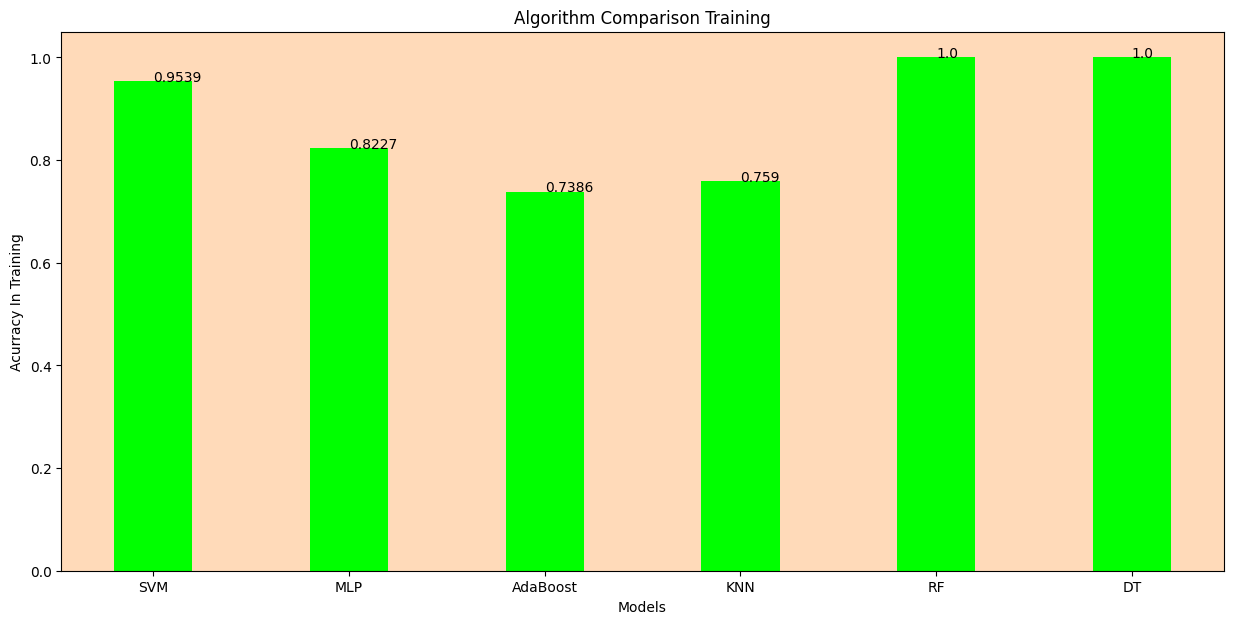

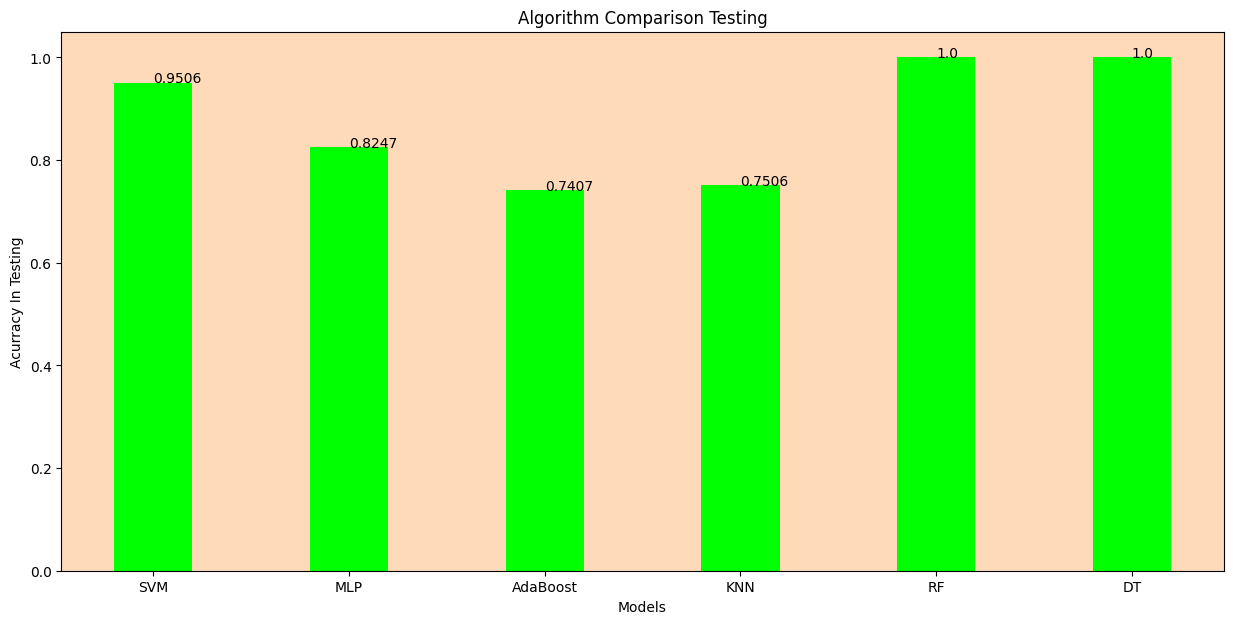

In [62]:
from matplotlib import pyplot as plt

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

if __name__ == '__main__':
    x = ['SVM', 'MLP', 'AdaBoost', 'KNN', 'RF', 'DT']
    y = [a, b, c, d, e,f]
    Y = [A, B, C, D, E,F]

    fig = plt.figure(figsize =(15, 7))
    ax = plt.axes()
    ax.set_facecolor("peachpuff")
    plt.bar(x, Y, width=0.4, color='lime')
    labels(x, Y)
    plt.xlabel('Models')
    plt.ylabel("Acurracy In Training")
    plt.title('Algorithm Comparison Training')
    plt.show()

    fig = plt.figure(figsize =(15, 7))
    ax = plt.axes()
    labels(x, y)
    ax.set_facecolor("peachpuff")
    plt.bar( x , y, width=0.4, color='lime')
    plt.xlabel('Models')
    plt.ylabel("Acurracy In Testing")
    plt.title('Algorithm Comparison Testing')
    plt.show()

